<>:8: SyntaxWarning: invalid escape sequence '\I'
<>:8: SyntaxWarning: invalid escape sequence '\I'
C:\Users\janna\AppData\Local\Temp\ipykernel_2940\4239522153.py:8: SyntaxWarning: invalid escape sequence '\I'
  df_raw = pd.read_csv("data\ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)
c:\Users\janna\miniconda3\envs\data_analysis\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


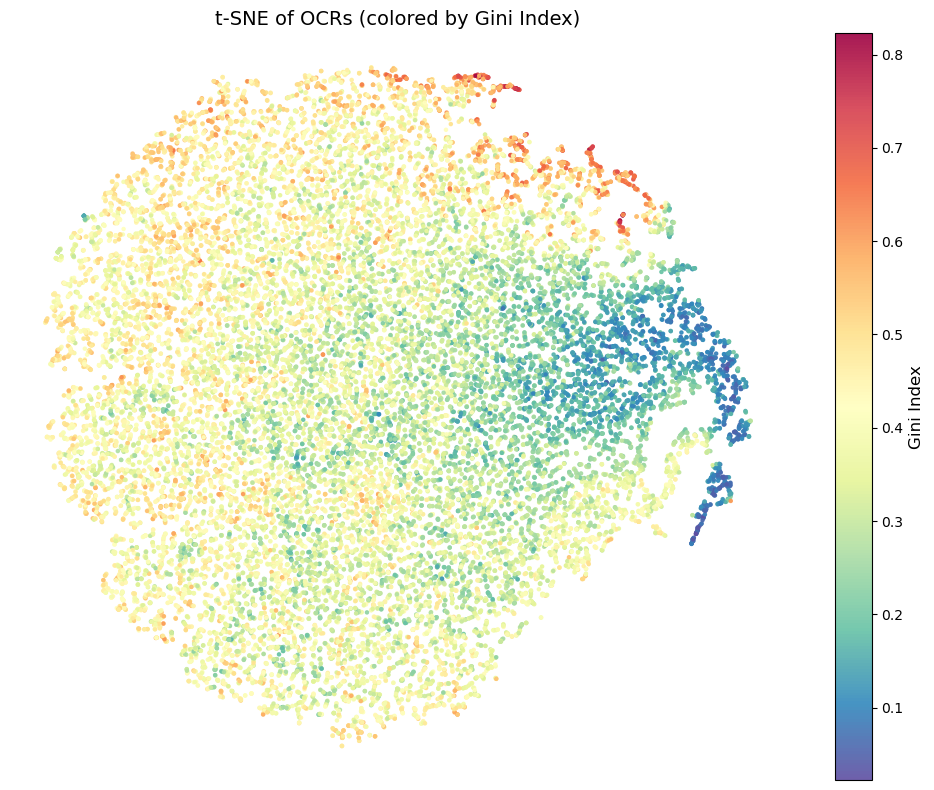

In [4]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df_raw = pd.read_csv("data\ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)

# Extract only the columns for NK and ILC. Only 5000 samples
df_expr = df_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI']]
df_sample = df_expr.sample(n=30000, random_state=42)

# Gini index function
def gini(array):
    array = np.array(array)
    array = array[np.isfinite(array)]  # NaNs/Inf filtern
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 1e-10  # numerische Stabilität
    array = np.sort(array)
    n = len(array)
    return (np.sum((2 * np.arange(1, n+1) - n - 1) * array)) / (n * np.sum(array))

# Gini-Index for each OCR
gini_scores = df_sample.apply(gini, axis=1)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10, n_iter=1000)
tsne_results = tsne.fit_transform(df_sample.fillna(0))  # NaNs ggf. durch 0 ersetzen

# Plot
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    tsne_results[:, 0], tsne_results[:, 1],
    c=gini_scores, cmap="Spectral_r", s=5, alpha=0.9
)
cbar = plt.colorbar(sc)
cbar.set_label("Gini Index", fontsize=12)
plt.title("t-SNE of OCRs (colored by Gini Index)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

For each OCR, a Gini index is computed to quantify how unevenly accessible the region is across the selected cell types. A low Gini index indicates widespread accessibility, whereas a high Gini index suggests cell-type-specific activity.

Next, a t-SNE dimensionality reduction is applied to project all OCRs into 2D based on their accessibility patterns. The resulting points are colored by their Gini scores to visualize how accessibility diversity distributes across the landscape.

Regions with low Gini scores (blue/green) appear clustered together, representing broadly accessible OCRs, likely corresponding to housekeeping or shared regulatory elements. In contrast, high Gini score OCRs (orange/red) form distinct regions in the plot, indicating cell-type-specific accessibility, which may correspond to lineage-defining enhancers or promoters.

This pattern supports the hypothesis that CREs can be classified into distinct functional groups based on their accessibility variability

